In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import dateutil.parser
%matplotlib inline
pd.set_option('display.max_colwidth', 100)


# Import Twitter Data

In [3]:
tweets_enphase_energy = pd.read_csv('../../preprocessing_v2/twitter_data_cleaned_04_24_21/1_enphase_energy_tweets_cleaned.csv')
tweets_first_solar = pd.read_csv('../../preprocessing_v2/twitter_data_cleaned_04_24_21/2_first_solar_tweets_cleaned.csv')
tweets_siemens = pd.read_csv('../../preprocessing_v2/twitter_data_cleaned_05_03_21/3_siemens_gamesa_tweets_cleaned_05_03.csv')
tweets_plug_power = pd.read_csv('../../preprocessing_v2/twitter_data_cleaned_04_24_21/4_plug_power_tweets_cleaned.csv')
tweets_tesla = pd.read_csv('../../preprocessing_v2/twitter_data_cleaned_04_24_21/5_tesla_tweets_cleaned.csv')
tweets_sunrun = pd.read_csv('../../preprocessing_v2/twitter_data_cleaned_04_24_21/6_sunrun_tweets_cleaned.csv')
tweets_sunpower = pd.read_csv('../../preprocessing_v2/twitter_data_cleaned_04_24_21/7_sunpower_tweets_cleaned.csv')
tweets_meridian_energy = pd.read_csv('../../preprocessing_v2/twitter_data_cleaned_04_24_21/8_meridian_energy_tweets_cleaned.csv')

# Generate weekly popularity time series

In [4]:
def delete_header_rows(df):
    index_names = df[df['CreatedAt'] == 'CreatedAt' ].index
    df.drop(index_names, inplace = True)
#     df.info()
    return df

def select_columns(df, columns):
    df = df[columns]
    return df

## Enphase Energy

In [99]:
tweets_enphase_energy = delete_header_rows(tweets_enphase_energy)

In [100]:
# drop unwanted columns    
columns_to_keep = ['CreatedAt','TweetText', 'Tweet_stemmed']
tweets_enphase_energy  = select_columns(tweets_enphase_energy , columns_to_keep)

In [101]:
tweets_enphase_energy.head(1)

,CreatedAt,TweetText,Tweet_stemmed
0,2021-04-01T00:55:27.000Z,リア充 $UAL: 96.18%🌻リア充 $DAL: 3.14%リア充 $ABNB: -1.15%グリーン $BE: -18.36%🤔💦グリーン $ENPH: -12.85...,"['リア充', 'ual', 'リア充', 'dal', 'リア充', 'abnb', 'グリーン', 'グリーン', 'enph', 'グリーン', 'plug', '半導体', 'nvda..."


In [102]:
tweets_enphase_energy['Date'] = pd.to_datetime(tweets_enphase_energy['CreatedAt'], errors='coerce')

<ipython-input-102-6b1f2b230644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_enphase_energy['Date'] = pd.to_datetime(tweets_enphase_energy['CreatedAt'], errors='coerce')


In [103]:
tweets_enphase_energy.head(1)

,CreatedAt,TweetText,Tweet_stemmed,Date
0,2021-04-01T00:55:27.000Z,リア充 $UAL: 96.18%🌻リア充 $DAL: 3.14%リア充 $ABNB: -1.15%グリーン $BE: -18.36%🤔💦グリーン $ENPH: -12.85...,"['リア充', 'ual', 'リア充', 'dal', 'リア充', 'abnb', 'グリーン', 'グリーン', 'enph', 'グリーン', 'plug', '半導体', 'nvda...",2021-04-01 00:55:27+00:00


In [104]:
tweets_enphase_energy['Year-Week'] = tweets_enphase_energy['Date'].dt.strftime('%Y-%U')

In [17]:
tweets_enphase_energy

,CreatedAt,TweetText,Tweet_stemmed,Date,Year-Week
0,2021-04-01T00:55:27.000Z,リア充 $UAL: 96.18%🌻リア充 $DAL: 3.14%リア充 $ABNB: -1.15%グリーン $BE: -18.36%🤔💦グリーン $ENPH: -12.85...,"['リア充', 'ual', 'リア充', 'dal', 'リア充', 'abnb', 'グリーン', 'グリーン', 'enph', 'グリーン', 'plug', '半導体', 'nvda...",2021-04-01 00:55:27+00:00,2021-13
1,2021-04-01T00:20:33.000Z,RT @BSchulz33868165: Category Overview of stocks I track:AVs/EVs: +7.05%; 25 of 26 Up (&gt;=6%: ...,"['rt', 'bschulz', 'categori', 'overview', 'stock', 'trackavsev', 'gt', 'mvi', 'beem', 'gp', 'lac...",2021-04-01 00:20:33+00:00,2021-13
2,2021-04-01T00:13:31.000Z,Today's #SP500 $SPX market overview $ENPH $KR $AAPL $VIAC $DISCK https://t.co/VIPIyhYaPw https...,"['today', 'sp', 'spx', 'market', 'overview', 'enph', 'kr', 'aapl', 'viac', 'disck', 'httpstcovip...",2021-04-01 00:13:31+00:00,2021-13
3,2021-04-01T00:07:30.000Z,$deewooding &amp; $ENPH https://t.co/PsJFn35WCC,"['deewood', 'amp', 'enph', 'httpstcopsjfnwcc']",2021-04-01 00:07:30+00:00,2021-13
4,2021-03-31T23:53:50.000Z,$ENPH Enphase Energy Inc. SEC Filing: Form 4 https://t.co/2C1BqKocux,"['enph', 'enphas', 'energi', 'inc', 'sec', 'file', 'form', 'httpstcocbqkocux']",2021-03-31 23:53:50+00:00,2021-13
...,...,...,...,...,...
141799,2011-01-05T16:58:25.000Z,Have an interest in solar - take a peek at all of our open positions at Enphase Energy! http://w...,"['interest', 'solar', 'take', 'peek', 'open', 'posit', 'enphas', 'energi', 'httpwwwenphaseenergy...",2011-01-05 16:58:25+00:00,2011-01
141800,2011-01-04T23:26:42.000Z,RESPONSABILE MARKETING e COMUNICAZIONE: Enphase Energy www.enphaseenergy.com è leader nella… h...,"['responsabil', 'market', 'e', 'comunicazion', 'enphas', 'energi', 'wwwenphaseenergycom', 'è', '...",2011-01-04 23:26:42+00:00,2011-01
141801,2011-01-04T13:37:55.000Z,Offerta di lavoro RESPONSABILE MARKETING e COMUNICAZIONE: Enphase Energy www.enphaseenergy.com ...,"['offerta', 'di', 'lavoro', 'responsabil', 'market', 'e', 'comunicazion', 'enphas', 'energi', 'w...",2011-01-04 13:37:55+00:00,2011-01
141802,2011-01-04T13:37:55.000Z,Offerta di lavoro RESPONSABILE MARKETING e COMUNICAZIONE: Enphase Energy www.enphaseenergy.com ...,"['offerta', 'di', 'lavoro', 'responsabil', 'market', 'e', 'comunicazion', 'enphas', 'energi', 'w...",2011-01-04 13:37:55+00:00,2011-01


In [105]:
tweets_enphase_energy['Year-Week'].unique()

array(['2021-13', '2021-12', '2021-11', '2021-10', '2021-09', '2021-08',
       '2021-07', '2021-06', '2021-05', '2021-04', '2021-03', '2021-02',
       '2021-01', '2021-00', '2020-52', '2020-51', '2020-50', '2020-49',
       '2020-48', '2020-47', '2020-46', '2020-45', '2020-44', '2020-43',
       '2020-42', '2020-41', '2020-40', '2020-39', '2020-38', '2020-37',
       '2020-36', '2020-35', '2020-34', '2020-33', '2020-32', '2020-31',
       '2020-30', '2020-29', '2020-28', '2020-27', '2020-26', '2020-25',
       '2020-24', '2020-23', '2020-22', '2020-21', '2020-20', '2020-19',
       '2020-18', '2020-17', '2020-16', '2020-15', '2020-14', '2020-13',
       '2020-12', '2020-11', '2020-10', '2020-09', '2020-08', '2020-07',
       '2020-06', '2020-05', '2020-04', '2020-03', '2020-02', '2020-01',
       '2020-00', '2019-52', '2019-51', '2019-50', '2019-49', '2019-48',
       '2019-47', '2019-46', '2019-45', '2019-44', '2019-43', '2019-42',
       '2019-41', '2019-40', '2019-39', '2019-38', 

In [106]:
tweets_count = tweets_enphase_energy.groupby('Year-Week').count()

In [107]:
tweets_count

,CreatedAt,TweetText,Tweet_stemmed,Date
Year-Week,,,,
2011-01,27,27,27,27
2011-02,21,21,21,21
2011-03,47,47,47,47
2011-04,21,21,21,21
2011-05,41,41,41,41
...,...,...,...,...
2021-09,1002,1002,1002,1002
2021-10,1189,1189,1189,1189
2021-11,634,634,634,634


In [108]:
tweets_count.rename(columns={"CreatedAt":"Count"}, inplace=True)

In [109]:
tweets_count.columns

Index(['Count', 'TweetText', 'Tweet_stemmed', 'Date'], dtype='object')

In [110]:
tweets_count  = tweets_count.drop(['TweetText', 'Tweet_stemmed', 'Date'], axis=1, inplace=True)

In [112]:
tweets_count

# Generate weekly popularity time series

In [219]:
def delete_header_rows(df):
    index_names = df[df['CreatedAt'] == 'CreatedAt' ].index
    df.drop(index_names, inplace = True)
    return df

def select_columns(df, columns):
    df = df[columns]
    return df

def create_year_week(df):
    df['Date'] = pd.to_datetime(df['CreatedAt'], errors='coerce')
    df['Year-Week'] = df['Date'].dt.strftime('%Y-%U')
    return df

def add_company_name(df, company):
    df['Company'] = company
    return df

def generate_weekly_counts(tweets_all, company):
    # delete headers on csv
    tweets_all = delete_header_rows(tweets_all)
    
    # drop unwanted columns 
    columns_to_keep = ['CreatedAt','TweetText', 'Tweet_stemmed']
    tweets = select_columns(tweets_all, columns_to_keep)
    
    # create year-week 
    tweets = create_year_week(tweets)
    
    # count popularity per week 
    tweets_count = tweets.groupby('Year-Week').count()
    tweets_count.drop(['TweetText', 'Tweet_stemmed', 'Date'], axis=1, inplace=True)
    
    # create count column
    tweets_count.rename(columns={"CreatedAt":"Count"}, inplace=True)
    
    
    # add name of company 
    tweets_count = add_company_name(tweets_count, company)
    
    return tweets_count

In [203]:
tweets_plug_power.head(1)

,CreatedAt,TweetId,AuthorId,TweetText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,2021-04-01T00:59:24.000Z,1377425328612671489,27525796,$plug $Tsla Biden announces $50 000 tax credits for those buying used or new Tesla’s! Will empl...,plug Tsla Biden announces tax credits for those buying used or new Tesla’s Will employ unempl...,"['plug', 'tsla', 'biden', 'announces', 'tax', 'credits', 'for', 'those', 'buying', 'used', 'or',...","['plug', 'tsla', 'biden', 'announces', 'tax', 'credits', 'buying', 'used', 'new', 'tesla', 'empl...","['plug', 'tsla', 'biden', 'announc', 'tax', 'credit', 'buy', 'use', 'new', 'tesla', 'employ', 'u...","['plug', 'tsla', 'biden', 'announces', 'tax', 'credit', 'buying', 'used', 'new', 'tesla', 'emplo..."


In [204]:
tweets_test = generate_weekly_counts(tweets_plug_power, 'Plug Power')

<ipython-input-202-7a50cf691b1d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['CreatedAt'], errors='coerce')
<ipython-input-202-7a50cf691b1d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year-Week'] = df['Date'].dt.strftime('%Y-%U')


In [205]:
tweets_test

,Count,Company
Year-Week,,
2011-00,1,Plug Power
2011-01,13,Plug Power
2011-02,85,Plug Power
2011-03,113,Plug Power
2011-04,8,Plug Power
...,...,...
2021-09,2155,Plug Power
2021-10,3794,Plug Power
2021-11,4141,Plug Power


In [208]:
tweets_test

,Count,Company
Year-Week,,
2011-00,1,Plug Power
2011-01,13,Plug Power
2011-02,85,Plug Power
2011-03,113,Plug Power
2011-04,8,Plug Power
...,...,...
2021-09,2155,Plug Power
2021-10,3794,Plug Power
2021-11,4141,Plug Power


<AxesSubplot:xlabel='Year-Week'>

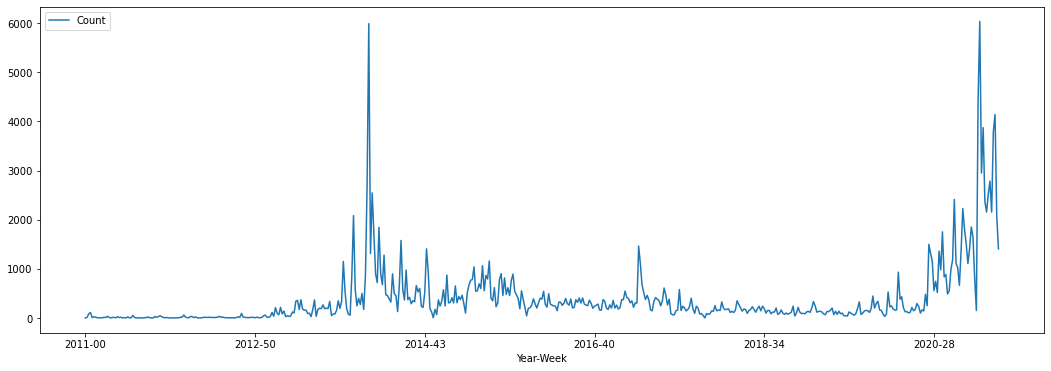

In [218]:
tweets_test.plot(figsize=(18,6))

# Plot time series

In [222]:
def plot_time_series(df, company):
    title=company
    ylabel='Twitter Popularity (tweets/week)'
    xlabel = 'Year-Week'
    
    ax = df['Count'].plot(figsize=(18,6), title=title)
    ax.autoscale(axis='x', tight=True)
    ax.set(xlabel=xlabel, ylabel=ylabel)

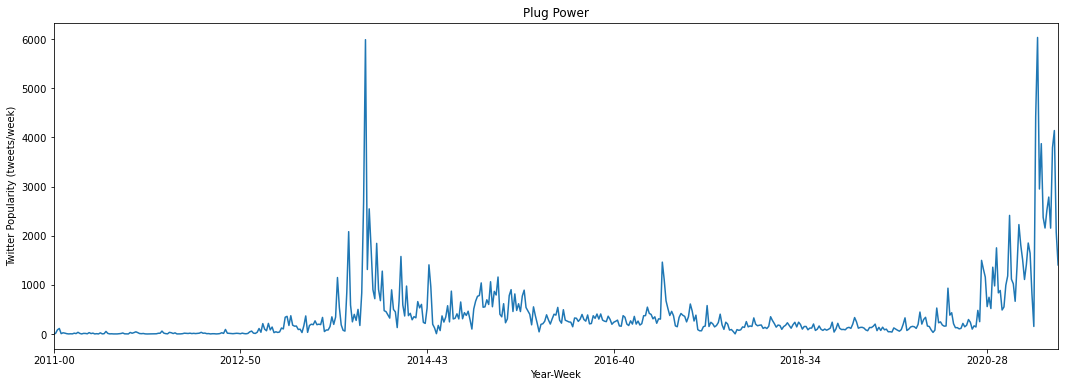

In [223]:
plot_time_series(tweets_test, 'Plug Power')

In [229]:
def create_date_time_index(df):
    df.index = pd.to_datetime(df.index)
#     df.rename(index={'CreatedAt':'CreatedAtDateTime'})
#     df.drop('CreatedAt', axis=1, inplace=True)
    return df


In [239]:
tweets_test

,Count,Company
Year-Week,,
2011-00,1,Plug Power
2011-01,13,Plug Power
2011-02,85,Plug Power
2011-03,113,Plug Power
2011-04,8,Plug Power
...,...,...
2021-09,2155,Plug Power
2021-10,3794,Plug Power
2021-11,4141,Plug Power


In [369]:
tweets_test['2016-01':'2021-13']

,Count,Company
Year-Week,,
2016-01,197,Plug Power
2016-02,209,Plug Power
2016-03,259,Plug Power
2016-04,391,Plug Power
2016-05,288,Plug Power
...,...,...
2021-09,2155,Plug Power
2021-10,3794,Plug Power
2021-11,4141,Plug Power


In [238]:
# create_date_time_index(tweets_test)
# tweets_test.index = pd.to_datetime(tweets_test.index)

# Stock Prices Time Series
----

## Clean Stock prices dataset

In [283]:
stock_prices = pd.read_csv('../../data/team/Stock Price Time Series/stock_prices_time_series_converged.csv')

In [284]:
stock_prices.index = pd.to_datetime(stock_prices['timestamp'])

In [285]:
stock_prices.drop(columns=['Unnamed: 9','Unnamed: 10'], inplace=True)

In [286]:
stock_prices.drop(columns=['mean delta', '-0.073169045'], inplace=True)

## Created Year-Week column

In [287]:
# Creating Year Week granularity from time stamp - resulting column name = Year-Week
stock_prices['Date'] = pd.to_datetime(stock_prices['timestamp'], errors='coerce')
stock_prices['Year-Week'] = stock_prices['Date'].dt.strftime('%Y-%U')

In [288]:
stock_prices.drop(['timestamp'],axis=1, inplace=True)

In [377]:
stock_prices['Ticker'].unique()

array(['ORA', 'SPWR', 'FSLR', 'VWDRY', 'COENF', 'GCTAY', 'TSLA', 'DQ',
       'ENPH', 'RUN', 'DNNGY', 'SCTY'], dtype=object)

## Create Weekly Mean dataframe

In [292]:
# Sort stock_prices in ascending order using Date column
stock_prices.sort_values('Date', ascending=True);

In [293]:
stock_prices = stock_prices.sort_index()

In [295]:
# Mean stock values per week granule per company, for overall change the groupby to be only on "Year-Week"
weekly_mean= stock_prices.groupby(['Ticker', 'Year-Week']).mean()

In [296]:
weekly_mean

open    high       low   close    volume   delta  \
Ticker Year-Week                                                        
COENF  2007-28     7.1080   7.108   7.10800   7.108     140.0  0.0000   
       2007-29     7.1000   7.100   7.10000   7.100       0.0  0.0000   
       2007-30     7.1000   7.100   7.10000   7.100       0.0  0.0000   
       2007-31     7.0500   7.050   7.05000   7.050     200.0  0.0000   
       2007-32     7.0500   7.050   7.05000   7.050       0.0  0.0000   
...                   ...     ...       ...     ...       ...     ...   
VWDRY  2021-12    60.8040  61.400  60.30700  60.800   74169.0 -0.0040   
       2021-13    67.0750  67.790  66.56375  67.290  124672.0  0.2150   
       2021-14    67.4680  68.022  66.58000  67.114   81719.8 -0.3540   
       2021-15    65.0180  65.362  64.30400  64.724   63239.4 -0.2940   
       2021-16    67.3394  68.134  66.75800  67.784   76064.8  0.4446   

                  deltaNorm  
Ticker Year-Week             
COENF  2007-28     0.017582  
       2007-29     0.017582  
       2007-30     0.017582  
       2007-31     0.017582  
       2007-32     0.017582  
...                     ...  
VWDRY  2021-12     0.016621  
       2021-13     0.069244  
       2021-14    -0.067481  
       2021-15    -0.053064  
       2021-16     0.124415  

[6713 rows x 7 columns]

In [297]:
weekly_mean.reset_index(inplace=True)

In [298]:
weekly_mean

,Ticker,Year-Week,open,high,low,close,volume,delta,deltaNorm
0,COENF,2007-28,7.1080,7.108,7.10800,7.108,140.0,0.0000,0.017582
1,COENF,2007-29,7.1000,7.100,7.10000,7.100,0.0,0.0000,0.017582
2,COENF,2007-30,7.1000,7.100,7.10000,7.100,0.0,0.0000,0.017582
3,COENF,2007-31,7.0500,7.050,7.05000,7.050,200.0,0.0000,0.017582
4,COENF,2007-32,7.0500,7.050,7.05000,7.050,0.0,0.0000,0.017582
...,...,...,...,...,...,...,...,...,...
6708,VWDRY,2021-12,60.8040,61.400,60.30700,60.800,74169.0,-0.0040,0.016621
6709,VWDRY,2021-13,67.0750,67.790,66.56375,67.290,124672.0,0.2150,0.069244
6710,VWDRY,2021-14,67.4680,68.022,66.58000,67.114,81719.8,-0.3540,-0.067481
6711,VWDRY,2021-15,65.0180,65.362,64.30400,64.724,63239.4,-0.2940,-0.053064


In [299]:
weekly_mean = weekly_mean.set_index('Year-Week')

In [301]:
weekly_mean = weekly_mean.sort_index()

In [303]:
weekly_mean

,Ticker,open,high,low,close,volume,delta,deltaNorm
Year-Week,,,,,,,,
2004-45,ORA,15.5000,16.34000,15.4850,15.860,1669250.0,0.3600,0.104087
2004-46,ORA,16.0000,16.23600,15.7420,15.860,150320.0,-0.1400,-0.016059
2004-47,ORA,16.5325,16.95500,16.4225,16.820,278950.0,0.2875,0.086666
2004-48,ORA,17.7600,17.99400,17.1840,17.470,115160.0,-0.2900,-0.052103
2004-49,ORA,16.9280,17.14800,16.5040,16.890,131180.0,-0.0380,0.008451
...,...,...,...,...,...,...,...,...
2021-16,DNNGY,51.5780,51.88998,51.1340,51.566,33048.8,-0.0120,0.014698
2021-16,COENF,5.1900,5.19000,5.1900,5.190,600.0,0.0000,0.017582
2021-16,SPWR,27.1080,28.18560,26.2340,27.304,3520985.6,0.1960,0.064679


In [317]:
weekly_mean_closing = pd.DataFrame(weekly_mean[['Ticker','close']])

In [318]:
weekly_mean_closing

,Ticker,close
Year-Week,,
2004-45,ORA,15.860
2004-46,ORA,15.860
2004-47,ORA,16.820
2004-48,ORA,17.470
2004-49,ORA,16.890
...,...,...
2021-16,DNNGY,51.566
2021-16,COENF,5.190
2021-16,SPWR,27.304


In [331]:
weekly_mean_closing_by_ticker = weekly_mean_closing.pivot( columns='Ticker', values='close')


In [332]:
weekly_mean_closing

,Ticker,close
Year-Week,,
2004-45,ORA,15.860
2004-46,ORA,15.860
2004-47,ORA,16.820
2004-48,ORA,17.470
2004-49,ORA,16.890
...,...,...
2021-16,DNNGY,51.566
2021-16,COENF,5.190
2021-16,SPWR,27.304


In [373]:
weekly_mean_closing_by_ticker_2016_2021 = weekly_mean_closing_by_ticker['2016-01':'2021-13']

In [374]:
weekly_mean_closing_by_ticker_2016_2021.drop(columns=['DNNGY','SCTY'], inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [375]:
weekly_mean_closing_by_ticker_2016_2021

Ticker,COENF,DQ,ENPH,FSLR,GCTAY,ORA,RUN,SPWR,TSLA,VWDRY
Year-Week,,,,,,,,,,
2016-01,3.168300,15.7360,3.1980,68.0220,3.430000,35.3500,9.996,28.3460,218.5060,22.42900
2016-02,3.168300,13.4740,2.5100,63.0220,3.366000,34.7260,8.396,23.7940,205.8600,21.26200
2016-03,3.161225,12.8125,2.2625,63.1075,3.270000,33.8500,8.425,22.8100,201.4850,20.84800
2016-04,3.140000,14.1480,2.3300,66.3440,3.364000,34.1840,9.010,24.2260,191.7820,21.19640
2016-05,3.140000,15.9980,2.2700,66.8040,3.662000,34.8160,8.278,25.0160,178.2260,21.17994
...,...,...,...,...,...,...,...,...,...,...
2021-09,5.700000,97.5980,162.5380,79.2040,6.968000,81.4600,58.800,33.6480,655.4920,59.51500
2021-10,5.700000,84.7660,152.6480,77.3620,6.888700,84.7600,56.516,33.1720,659.5940,61.04620
2021-11,5.350000,84.4460,161.5440,80.5420,6.744000,79.7740,56.590,33.3540,678.9320,60.47700


# Merge Popularity and Stock prices

# Lag Analysis

In [240]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Fixing random state for reproducibility
# np.random.seed(19680801)

# fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
# ax1.xcorr(series[["low"]].to_numpy().flatten(), series[["delta"]].to_numpy().flatten(), usevlines=True, maxlags=50, normed=True, lw=2)
# ax1.grid(True)

# #ax2.acorr(series[["low"]].to_numpy().flatten(), usevlines=True, normed=True, maxlags=50, lw=2)
# ax2.grid(True)

# plt.show()
